In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
hbrmn = pd.read_csv("haberman.csv")   # loading data
print(hbrmn.shape)                    # print the shape to understand the row and columns

(306, 4)


In [98]:
print(hbrmn.columns)                  # print the all features 

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [99]:
hbrmn["status"].value_counts()        # count the no data in each class

1    225
2     81
Name: status, dtype: int64

# ploting the pairplot, it give graphical representation of each feature with respect to other one

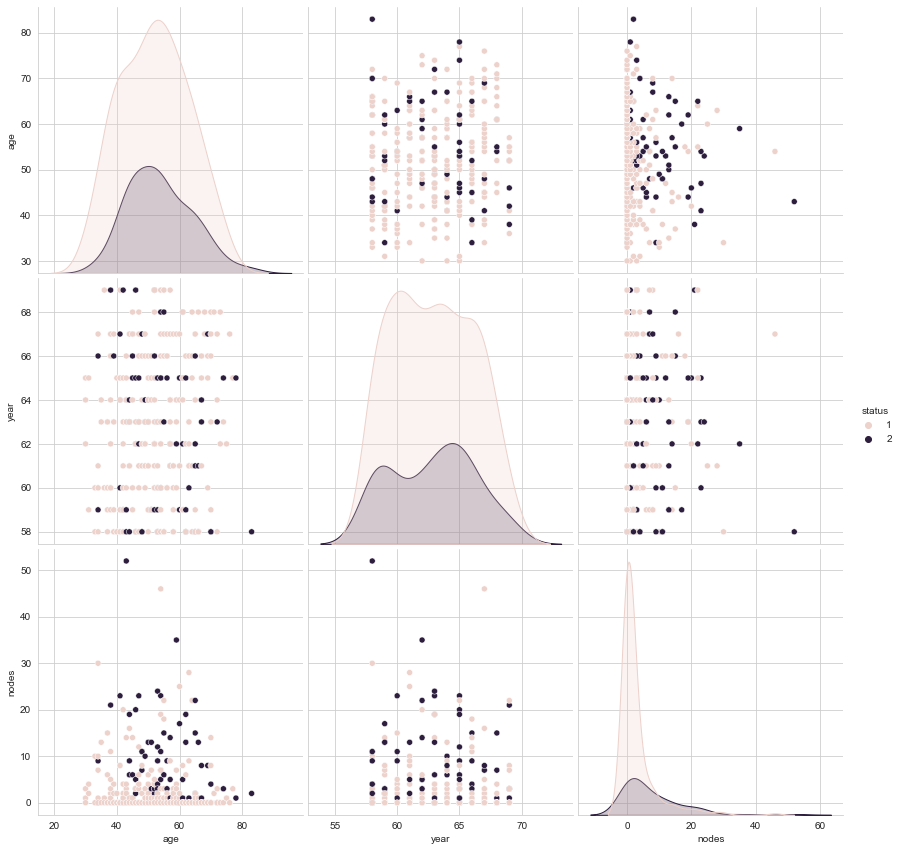

In [100]:
sns.set_style("whitegrid");
sns.pairplot(hbrmn, hue="status", height=4);
# plt.title("pairplot of hbrmn")
plt.show()

obervations - 
here we get total six graphs but we see go through above diagonal one


1 - age/year, age/nodes, year/nodes and as we see  [age/node] is more clear than the other one 

2 - in graph [age/year ,  year/nodes] we see more overlapping of the points  

# here we draw seperate graph for the [age/node]

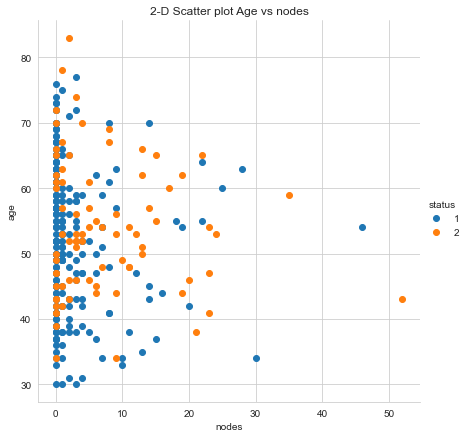

In [101]:
sns.set_style("whitegrid");
sns.FacetGrid(hbrmn, hue="status", height=6) \
   .map(plt.scatter,"nodes", "age") \
   .add_legend();
plt.title("2-D Scatter plot Age vs nodes")
plt.show();


observation - here we clearly see understand the approx(range) of age and nodes  according to the status

# Histogram

C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


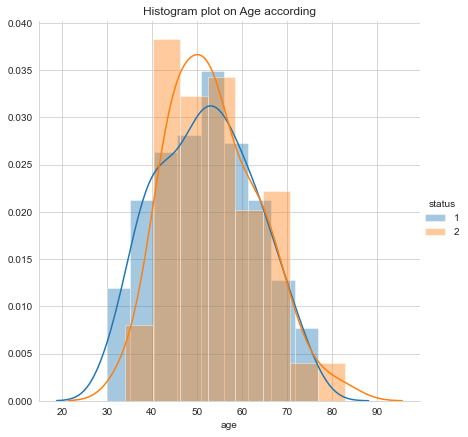

In [102]:
sns.FacetGrid(hbrmn, hue="status", height=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram plot on Age according")
plt.show();

observation - very hard to understand , because mostly data overlap.... even the pdf conside 

C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


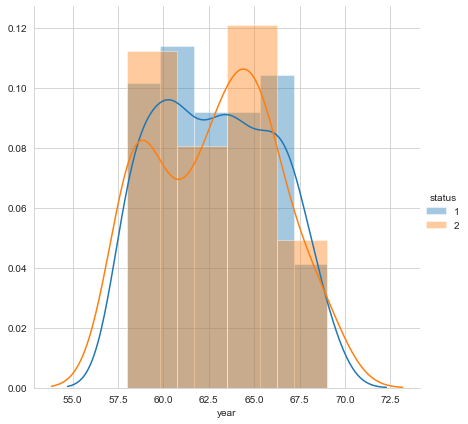

In [103]:
sns.FacetGrid(hbrmn, hue="status", height=6) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

observation - very hard to understand , because mostly data overlap even pdf overlap

C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dev64\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


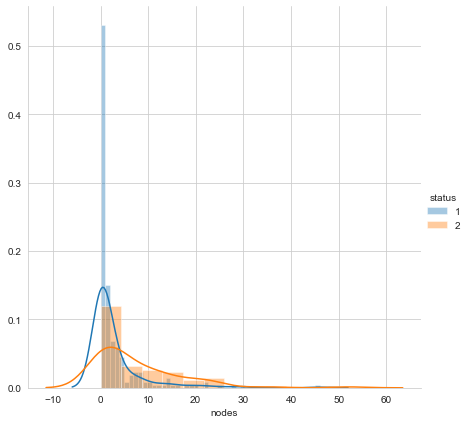

In [104]:
sns.FacetGrid(hbrmn, hue="status", height=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

observation - more no. of people who survive have very less no. of the nodes

final observation --  nodes >>> age > year 

# PDF, CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


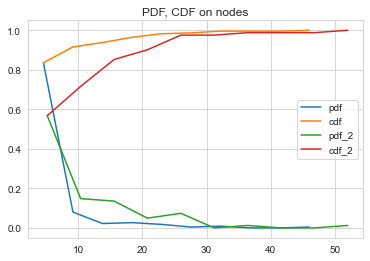

In [105]:
hbrmn_1 = hbrmn.loc[hbrmn["status"] == 1]
hbrmn_2 = hbrmn.loc[hbrmn["status"] == 2]

counts, bin_edges = np.histogram(hbrmn_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf')
plt.plot(bin_edges[1:], cdf,label = "cdf")
plt.legend()

counts, bin_edges = np.histogram(hbrmn_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title("PDF, CDF on nodes")
plt.plot(bin_edges[1:],pdf,label = 'pdf_2')
plt.plot(bin_edges[1:], cdf,label = "cdf_2")
plt.legend()

observations : as we see both pdf and cdf line in the graph, A.T.CDF -  81-82% survival chance have nodes less than equal to 4 or 5

observations : as we see both pdf and cdf line in the graph, A.T.CDF_0 - 58-59% non-survival chance have nodes less than equal to 4 or 5

In [106]:
#Mean, Variance, Std-deviation,

print("means:")
print(np.mean(hbrmn_1['nodes']))
print(np.mean(hbrmn_2['nodes']))


print("\nSTD-dev:");
print(np.std(hbrmn_1['nodes']))
print(np.std(hbrmn_2['nodes']))

means:
2.7911111111111113
7.45679012345679

STD-dev:
5.857258449412131
9.128776076761632


In [107]:
#Median, Quantiles, Percentiles, IQR.

print("\nMedians:")
print(np.median(hbrmn_1['nodes']))
print(np.median(hbrmn_2['nodes']))

print("\nQuantiles:")
print(np.percentile(hbrmn_1['nodes'],np.arange(0, 100, 25)))
print(np.percentile(hbrmn_2['nodes'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hbrmn_1['nodes'],90))
print(np.percentile(hbrmn_2['nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hbrmn_1['nodes']))
print(robust.mad(hbrmn_2['nodes']))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plot

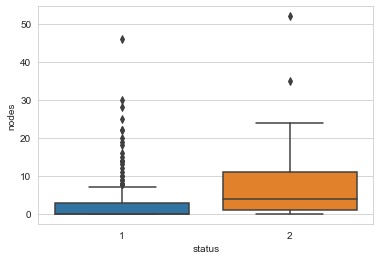

In [108]:
sns.boxplot(x='status',y='nodes', data=hbrmn)
plt.show()

observations:  here we see the interquartile range of the nodes, in servival - not more than 4  

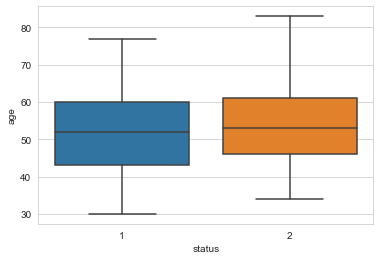

In [109]:
sns.boxplot(x='status',y='age', data=hbrmn)
plt.show()

observation: interquartile range of servival in age factor have 44-60 
    

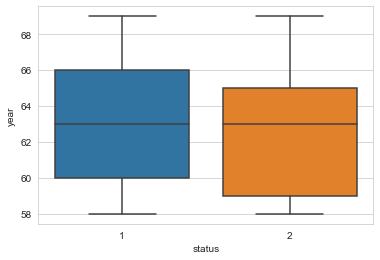

In [110]:
sns.boxplot(x='status',y='year', data=hbrmn)
plt.show()

observation: here we see that interqartile range of servival is 60 - 66

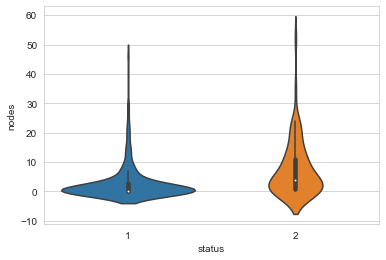

In [111]:
sns.violinplot(x="status", y="nodes", data=hbrmn, size=8)
plt.show()

observation: node density is high on 0 at servival 

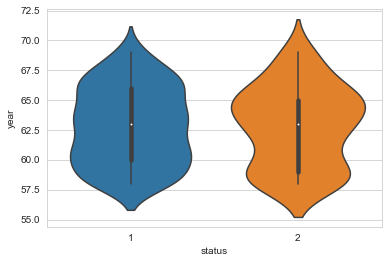

In [112]:
sns.violinplot(x="status", y="year", data=hbrmn, size=8)
plt.show()

observation: year density is high on 60 at survival and on non survival at 64 

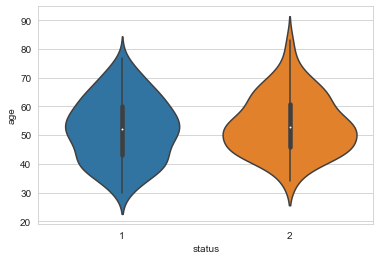

In [113]:
sns.violinplot(x="status", y="age", data=hbrmn, size=8)
plt.show()

observation: age density of survival at 54 and non survival at 50

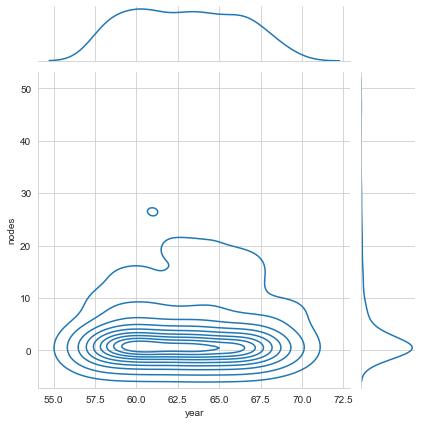

In [114]:
sns.jointplot(x="year", y="nodes", data=hbrmn_1, kind="kde");
plt.show();

observation:-     1- maximum survival have nodes between 0 - 4 with low varience

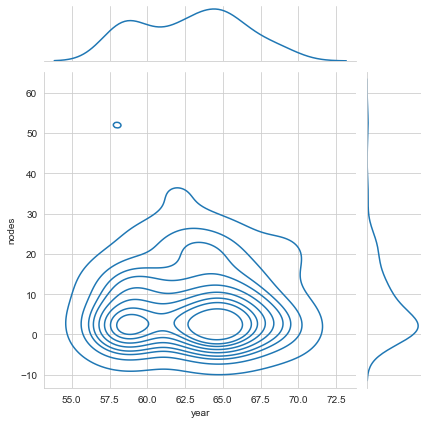

In [115]:
sns.jointplot(x="year", y="nodes", data=hbrmn_2, kind="kde");
plt.show();

observation: here in the non-survival the nodes have higher value what high varience